In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
file_path = 'corpus_all.txt'  # Replace with the actual path to your text file

lines = []  # Empty list to store the lines

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            lines.append(line.strip())  # Append the line to the list, removing any leading/trailing whitespace

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

#file_path = 'corpus_all.txt'  # Replace with the actual path to your text file
first_words = []  # Empty list to store the first words

try:
    for line in lines:
        words = line.strip().split()  # Split the line into words
        if words:
            first_word = words[0]  # Get the first word
            first_words.append(first_word)  # Append the first word to the list

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")


# Define the status levels
status_levels = ["happy","angry","fear","disgust","sad","surprise",]

# Initialize a list to store the extracted status levels and sentences
extracted_data = []

# Iterate over the texts
for text in lines:
    # Initialize variables to store the extracted status level and sentence
    status = ""
    sentence = ""

    # Iterate over the status levels
    for level in status_levels:
        if level in text:
            # Split the text based on the status level
            split_text = text.split(level, 1)

            # Extract the status level and sentence
            status = level
            sentence = split_text[1].strip()
            break

    # Append the extracted status level and sentence to the list
    extracted_data.append({"Status": status, "Sentence": sentence})
    
df = pd.DataFrame(extracted_data)
sentences = df['Sentence']
labels = df['Status']

In [3]:
df

,Status,Sentence
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...
4,angry,রাতের বেলা আবার কিসের সকাল।
...,...,...
6284,surprise,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6285,surprise,এই কি স্বাধীন দেশ
6286,sad,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6287,angry,চুদলাম দাদা পয়সা নাই


In [4]:
# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post')

# Convert labels to numerical values
label_mapping = {'happy': 0, 'angry': 1, 'fear': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
numerical_labels = np.array([label_mapping[label] for label in labels])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, numerical_labels, test_size=0.2, random_state=42)

# Build a more complex GRU model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=padded_sequences.shape[1]),
    Bidirectional(GRU(128, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_mapping), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
  4/158 [..............................] - ETA: 23:27 - loss: 1.7892 - accuracy: 0.1797

KeyboardInterrupt: 

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post')

# Convert labels to numerical values
label_mapping = {'happy': 0, 'angry': 1, 'fear': 2, 'disgust': 3, 'sad': 4, 'surprise': 5}
numerical_labels = np.array([label_mapping[label] for label in labels])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, numerical_labels, test_size=0.2, random_state=42)

# Build a more complex GRU model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=padded_sequences.shape[1]),
    Bidirectional(GRU(128, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_mapping), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
158/158 [==============================] - 1009s 6s/step - loss: 1.5972 - accuracy: 0.3592 - val_loss: 1.4428 - val_accuracy: 0.4332
Epoch 2/10
158/158 [==============================] - 977s 6s/step - loss: 1.2503 - accuracy: 0.5424 - val_loss: 1.3893 - val_accuracy: 0.4634
Epoch 3/10
158/158 [==============================] - 124692s 794s/step - loss: 0.8932 - accuracy: 0.6762 - val_loss: 1.5030 - val_accuracy: 0.4531
Epoch 4/10
158/158 [==============================] - 966s 6s/step - loss: 0.5942 - accuracy: 0.7841 - val_loss: 1.9034 - val_accuracy: 0.4213
Epoch 5/10
158/158 [==============================] - 954s 6s/step - loss: 0.3904 - accuracy: 0.8680 - val_loss: 2.2072 - val_accuracy: 0.4459
Epoch 6/10
158/158 [==============================] - 1871s 12s/step - loss: 0.2502 - accuracy: 0.9183 - val_loss: 2.5798 - val_accuracy: 0.4213
Epoch 7/10
158/158 [==============================] - 957s 6s/step - loss: 0.1793 - accuracy: 0.9463 - val_loss: 2.7516 - val_accuracy

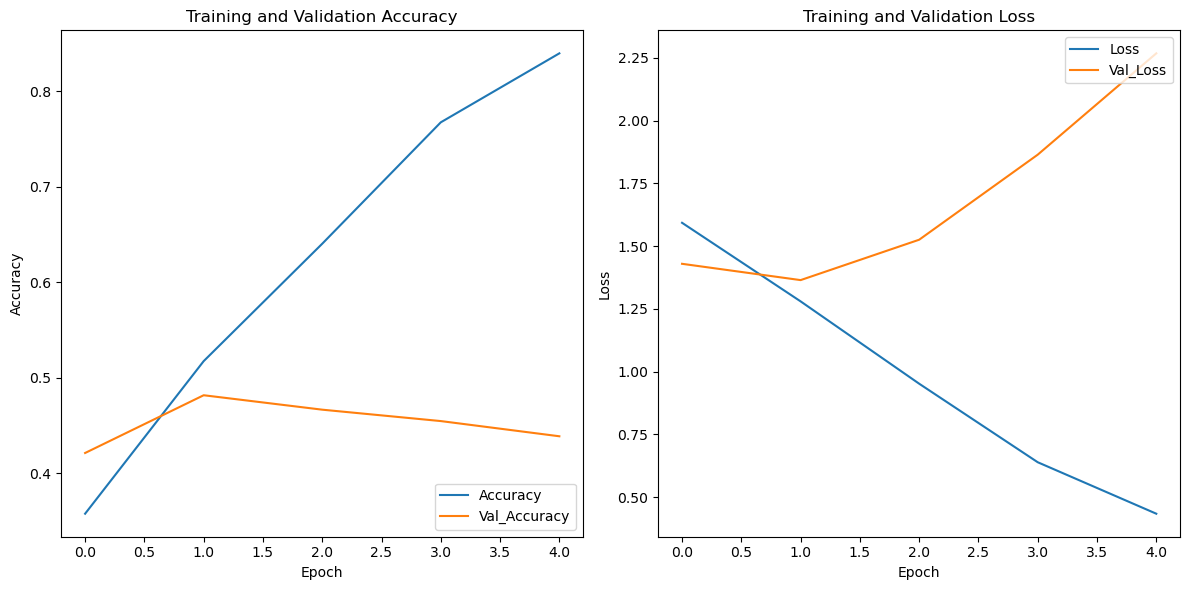

In [7]:
# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [8]:

# Build a GRU model with tanh activation
modelUseTanh = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=padded_sequences.shape[1]),
    Bidirectional(GRU(128, activation='tanh', return_sequences=True)),
    Bidirectional(GRU(64, activation='tanh')),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(len(label_mapping), activation='softmax')
])

# Compile the model
modelUseTanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
historyUseTanh = modelUseTanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
                                  

Epoch 1/10
158/158 [==============================] - 1368s 8s/step - loss: 1.5589 - accuracy: 0.3771 - val_loss: 1.3977 - val_accuracy: 0.4531
Epoch 2/10
158/158 [==============================] - 1544s 10s/step - loss: 1.1288 - accuracy: 0.5899 - val_loss: 1.3835 - val_accuracy: 0.4801
Epoch 3/10
158/158 [==============================] - 1331s 8s/step - loss: 0.6862 - accuracy: 0.7478 - val_loss: 1.6670 - val_accuracy: 0.4618
Epoch 4/10
158/158 [==============================] - 1253s 8s/step - loss: 0.3653 - accuracy: 0.8774 - val_loss: 2.2470 - val_accuracy: 0.4491
Epoch 5/10
158/158 [==============================] - 1192s 8s/step - loss: 0.1982 - accuracy: 0.9445 - val_loss: 2.4549 - val_accuracy: 0.4332
Epoch 6/10
158/158 [==============================] - 1158s 7s/step - loss: 0.1073 - accuracy: 0.9720 - val_loss: 2.7233 - val_accuracy: 0.4475
Epoch 7/10
158/158 [==============================] - 1172s 7s/step - loss: 0.0823 - accuracy: 0.9807 - val_loss: 2.7868 - val_accuracy

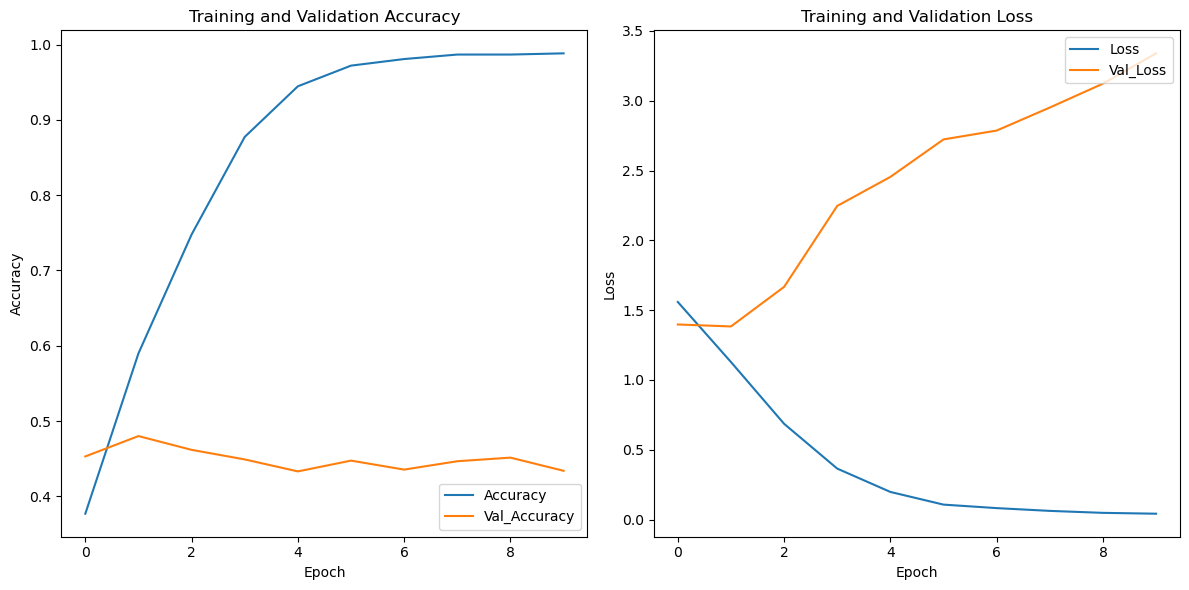

In [9]:
# Plot training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(historyUseTanh.history['accuracy'], label='Accuracy')
plt.plot(historyUseTanh.history['val_accuracy'], label = 'Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(historyUseTanh.history['loss'], label='Loss')
plt.plot(historyUseTanh.history['val_loss'], label = 'Val_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()